In [6]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../") if "../" not in sys.path else None # avoid adding multiple relave paths to sys.path

# custom packages
from ratsimulator import Agent, trajectory_generator
from ratsimulator.Environment import Rectangle, RectanglewObjects


In [10]:
a = RectanglewObjects()

Singular matrix
Singular matrix


# Initialise Environment

In [11]:
# Environment params
boxsize = (2.2, 2.2)
origo = (0,0)
soft_boundary = 0.2

# Init Environment
env = RectanglewObjects(boxsize=boxsize, soft_boundary=soft_boundary, no_objects = 2)
# 
# add extra walls
env.add_wall(name="free_wall1", bias=np.array([0.4,0.4]),slope=np.array([0.8,0.8]),t=[0,1])
#env.add_wall(name="free_wall2", bias=np.array([0.4,1.5]),slope=np.array([0.8,0]),t=[0,1])

Singular matrix
Singular matrix


In [12]:
# create track
seq_len=2000
gen = trajectory_generator(env,seq_len=seq_len)
outputs = next(gen)
positions,agent = outputs[0], outputs[-1]

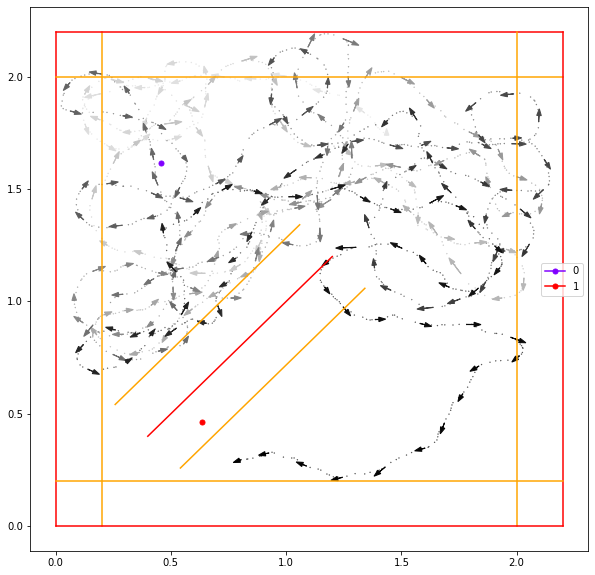

In [14]:
# plot track
fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
agent.plot_trajectory(axs,ds=8)
plt.legend()
#axs.scatter(*zip(*c))

In [19]:
print(agent.objects_observed.shape)
print(agent.positions.shape)
p_i = np.sum(agent.objects_observed, axis = 1)>0
print(p_i)
c = agent.positions[p_i]
d = agent.objects_observed[p_i]
print(c.shape)
print(d.shape)

(2001, 2)
(2001, 2)
[False False False ... False False False]
(19, 2)
(19, 2)


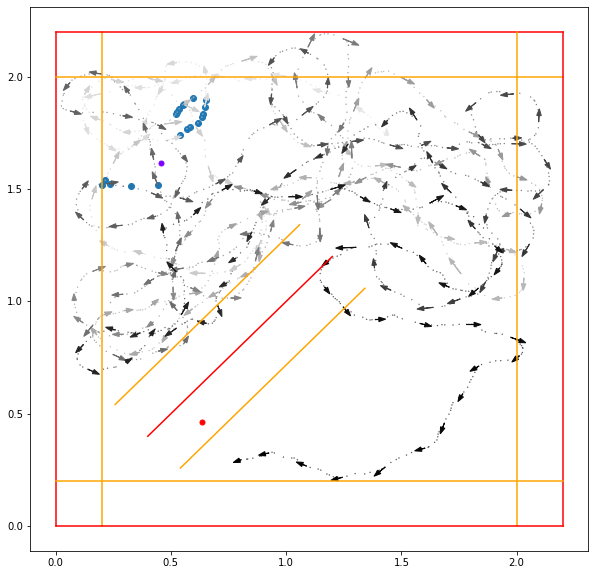

In [29]:

fig,axs=plt.subplots(figsize=(10,10))
env.plot_board(axs)
axs.scatter(c[:,0], c[:,1])
agent.plot_trajectory(axs,ds=8)

#axs.scatter(*zip(*c))

In [121]:
print(c[0])
print(d[0])

[0.96448034 2.09819888]
[1. 0.]


In [146]:
#ax.scatter(*zip(*c))
env.plot_board(axs)
plt.show()

In [85]:
c.shape

(327, 2)

In [63]:
agent.positions[:3]

array([[2.1845626 , 1.87906482],
       [2.1922813 , 1.86908299],
       [2.19614065, 1.86255471]])

In [35]:
idx0 = agent.positions.shape[0]

delta_p = np.cumsum(agent.velocities[idx0:], axis=0) 
delta_p

array([], shape=(0, 2), dtype=float64)